## Predicting Survival on the Titanic using Logistic Regression

We will be building a logistic regression classifier to predict survival on the titanic.   

This model will use the independent variables sex and age to predict the dependent variable survived.  There are many other variables in the dataset that we could use.

### Data Prep
First, I will start with some data prep to get my data ready to be used in a model.

In [49]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
#reading the data from the disk into memory
df = pd.read_csv("train.csv")

In [51]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [52]:
# Create a new data-frame, and add to it the variables we are going to fit
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['Pclass'] = df['Pclass']
X['Parch'] = df['Parch']
X['SibSp'] = df['SibSp']
X['survived'] = df['Survived']

In [53]:
X

,sex,age,Pclass,Parch,SibSp,survived
0,male,22.0,3,0,1,0
1,female,38.0,1,0,1,1
2,female,26.0,3,0,0,1
3,female,35.0,1,0,1,1
4,male,35.0,3,0,0,0
5,male,NaN,3,0,0,0
6,male,54.0,1,0,0,0
7,male,2.0,3,1,3,0
8,female,27.0,3,2,0,1
9,female,14.0,2,0,1,1


In [54]:
# survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [55]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [56]:
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [57]:
X.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [58]:
X.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [59]:
X.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### One hot encoding of variables

In [60]:
X = X.join(pd.get_dummies(df.Pclass, prefix='Pclass'))
X = X.drop(['Pclass', 'Pclass_2'], axis=1)

In [61]:
X = X.join(pd.get_dummies(df.Parch, prefix='Parch'))
X = X.drop(['Parch', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'], axis=1)

In [62]:
X = X.join(pd.get_dummies(df.SibSp, prefix='SibSp'))
X = X.drop(['SibSp', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'], axis=1)

In [63]:
X

,sex,age,Pclass_1,Pclass_3,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1
0,0.0,22.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,26.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,0.0,29.699118,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.0,54.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,2.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,1.0,27.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1.0,14.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
X.columns

Index([u'sex', u'age', u'Pclass_1', u'Pclass_3', u'Parch_0', u'Parch_1',
       u'Parch_2', u'SibSp_0', u'SibSp_1'],
      dtype='object')

In [65]:
# Scaling our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [66]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Logistic Model

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [68]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [73]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.72      0.76        74

avg / total       0.82      0.82      0.81       179



In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

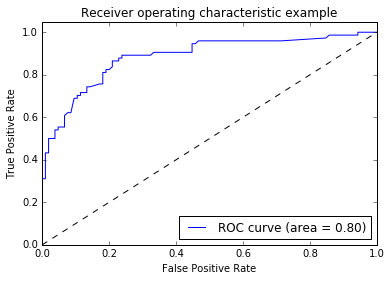

In [75]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()